In [1]:
#library import
import pandas as pd # for data manipulation and analysis
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization


In [2]:
df= pd.read_csv('../Data/Raw/Nepali_dataset.csv')

In [3]:
df_copy= df.copy()

In [4]:
# Importing custom python script to transform Hate sentiment dataset's Output classes to single target class
from create_target_label import create_target_column

df_copy,label_encoder = create_target_column(df_copy, "Sentiment", "Polarity")

In [5]:
list(label_encoder.classes_)

['FEEDBACK_0',
 'FEEDBACK_1',
 'GENERAL_0',
 'GENERAL_1',
 'PROFANITY_0',
 'PROFANITY_1',
 'VIOLENCE_0',
 'VIOLENCE_1']

In [6]:
df_copy.head()

,Text,Aspect Term,Target
0,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...,जोगाउन को लागि,2
1,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...,लखेटनु पछ,3
2,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !,ससकृती ध्वस्त पार्ने,3
3,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...,भुमाफिया,3
4,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...,बेची सके,3


## We created a single target for each Sentiment polarity to simplify Model training 

In [7]:
# Dropping the Aspect Term feature

df_copy.drop("Aspect Term", axis=1, inplace= True)

## Now we import a custom python script for returning the embeddings to the dataframe


 the models of encoders should be strictly defined as glove_model, word2vev_model, fasttext_model to work with the script

In [8]:
from generate_embeddings import load_word2vec_model, load_fasttext_model, load_glove_embeddings_dict, generate_glove_embeddings, generate_fasttext_embeddings, generate_word2vec_embeddings

# let's test on Glove
glove_model = load_glove_embeddings_dict("../Data/Preprocessed/glove_embeddings.txt")

# Generate GloVe embeddings
df_glove= df_copy.copy()
df_glove = generate_glove_embeddings(df_glove, "Text", glove_model)

In [9]:
df_glove.head()

,Text,glove_embeddings,Target
0,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...,"[-0.20295857, 0.3834819, 0.40714434, 0.2004464...",2
1,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...,"[-0.23167613, 0.38556933, 0.39157468, 0.078473...",3
2,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !,"[-0.22390805, 0.23769307, 0.42561498, 0.307606...",3
3,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...,"[-0.20357463, 0.2748196, 0.5259635, 0.24449758...",3
4,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...,"[-0.26102683, 0.37196454, 0.39651102, 0.138382...",3


In [10]:
glove_model["गुठी"]

array([-0.2505824 ,  0.18538585,  0.3547338 ,  0.14469296,  0.01504079,
       -0.2619502 ,  0.12239891,  0.79824483, -0.21303594, -0.29311386,
       -0.31846476, -0.3110927 , -0.0756995 ,  0.15410192, -0.006857  ,
       -0.5565214 ,  0.11701115, -0.37545002, -0.03858599, -0.42105108,
        0.20500495,  0.06896232,  0.43412763,  0.15874211, -0.1681155 ,
       -0.09409916,  0.03480982,  0.01099336, -0.4772947 , -0.02961799,
        0.21569028, -0.03261889, -0.1590511 , -0.564937  , -0.12503703,
        0.23806275, -0.00435174, -0.2741125 , -0.22300099, -0.29128534,
       -0.06358805, -0.19403796, -0.19090469,  0.07861757,  0.2571553 ,
       -0.07051816, -0.24124868, -0.00766154,  0.18287888,  0.11368691,
        0.19673643, -0.35600448,  0.23229878, -0.30381894, -0.08004031,
        0.10745744, -0.01547284,  0.0074888 , -0.3179779 ,  0.07723755,
        0.01180275,  0.02935823,  0.02466006,  0.0297574 , -0.36498818,
        0.32565743,  0.13907443,  0.65415126, -0.40734887,  0.28

In [11]:
print(df_glove.loc[0,"glove_embeddings"])

[-0.20295857  0.3834819   0.40714434  0.20044647 -0.08248903 -0.31873846
  0.03309819  1.0058982  -0.3017175  -0.2848489  -0.31270745 -0.38607934
  0.04180235  0.3093452  -0.01735919 -0.59030586  0.21402082 -0.3227905
  0.12231767 -0.6586451   0.19113716 -0.02794635  0.4365205   0.13144818
 -0.2047246  -0.04487855  0.10453697  0.05309999 -0.54064023 -0.10749426
  0.14293334 -0.07249115 -0.11021882 -0.5869757  -0.10406172  0.20567709
  0.09961291 -0.5253951  -0.38013488 -0.3479512  -0.15888266 -0.24513465
 -0.26896867  0.1284839   0.26869485 -0.14014159 -0.18190128 -0.08109819
  0.07046348  0.11883952  0.16236936 -0.29878864  0.01655997 -0.28238165
 -0.04316857  0.08078511  0.04420938 -0.07862841 -0.28732303  0.1141367
  0.03066206  0.03885545 -0.20692438  0.09054345 -0.48928413  0.34497645
  0.27996337  0.5911556  -0.45731106  0.4246466   0.13633202  0.6059423
  0.43819064 -0.16285007  0.3649851   0.13866077  0.16921614 -0.21840213
 -0.20323153 -0.23350824 -0.41941643 -0.29286063 -0.43

In [12]:
# let's test on word2vec
word2vec_model = load_word2vec_model("../Data/Preprocessed/word2vec_embeddings.txt")

# Generate embeddings
df_word2vec= df_copy.copy()
df_word2vec = generate_word2vec_embeddings(df_word2vec, "Text", word2vec_model)

In [13]:
df_word2vec.head()

,Text,word2vec_embeddings,Target
0,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...,"[-0.24682237, 0.35339615, 0.3600155, 0.2801106...",2
1,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...,"[-0.24493806, 0.35242707, 0.3561586, 0.2733936...",3
2,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !,"[-0.27001628, 0.39004076, 0.39789718, 0.321739...",3
3,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...,"[-0.2993334, 0.428793, 0.44139257, 0.3441041, ...",3
4,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...,"[-0.22836164, 0.33540264, 0.33614093, 0.258507...",3


In [14]:
# let's test on word2vec
fasttext_model = load_fasttext_model("../Data/Preprocessed/fasttext_embeddings.model")

# Generate GloVe embeddings
df_fasttext= df_copy.copy()
df_fasttext = generate_fasttext_embeddings(df_fasttext, "Text", fasttext_model)

In [15]:
df_fasttext.head()

,Text,fasttext_embeddings,Target
0,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...,"[-0.28684744, -0.33160678, -0.7890507, -0.8186...",2
1,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...,"[-0.2671894, -0.30770808, -0.73609644, -0.7640...",3
2,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !,"[-0.29913396, -0.34533945, -0.8211022, -0.8495...",3
3,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...,"[-0.30930617, -0.35713866, -0.84729975, -0.877...",3
4,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...,"[-0.23962343, -0.27789554, -0.663212, -0.68909...",3


# now that we have encoded target and embeddings, let's train our classsifers

Classification Models
1. Support Vector Machines (SVC)
2. KNeighborsClassifer
3. GaussianNB
4. DecisionTreeCLassifer
5. LogisticRegression
6. RandomForestClassifer
7. xgboost

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

## custom function for train_test_val split with random state 68

this function also flattens the embeddings so make sure df has only the embedding and target. <br>
In future if new features are added modify the script to handle the changes !!

In [17]:
from train_test_val_split import train_test_val_split

In [18]:
df_fasttext.head()

,Text,fasttext_embeddings,Target
0,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...,"[-0.28684744, -0.33160678, -0.7890507, -0.8186...",2
1,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...,"[-0.2671894, -0.30770808, -0.73609644, -0.7640...",3
2,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !,"[-0.29913396, -0.34533945, -0.8211022, -0.8495...",3
3,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...,"[-0.30930617, -0.35713866, -0.84729975, -0.877...",3
4,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...,"[-0.23962343, -0.27789554, -0.663212, -0.68909...",3


In [19]:
df_fasttext.drop("Text", axis=1, inplace=True)

# Usage with fasttext:
X_train_fasttext, X_test_fasttext, X_val_fasttext, y_train_fasttext, y_test_fasttext, y_val_fasttext = train_test_val_split(df_fasttext, "fasttext_embeddings")


Shape of feature vectors (X): (4035, 100)
Shape of target labels (y): (4035,)


In [20]:
X_train_fasttext.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3216,-0.354994,-0.401457,-0.961021,-0.996064,0.349389,1.961095,-1.557485,0.147942,0.035039,-0.690268,...,-0.914869,-0.246088,0.316536,0.305837,2.267665,0.854630,0.431082,-0.747942,1.043325,-1.124630
2849,-0.245992,-0.282192,-0.673653,-0.698126,0.243795,1.374759,-1.090887,0.102428,0.027457,-0.483198,...,-0.644075,-0.174233,0.225753,0.214881,1.587696,0.600308,0.301314,-0.524042,0.731999,-0.788553
1476,-0.273750,-0.315074,-0.754889,-0.782559,0.270993,1.538326,-1.220775,0.113274,0.029624,-0.539558,...,-0.723807,-0.194251,0.253595,0.240541,1.777570,0.674180,0.337078,-0.586460,0.818012,-0.884090
1761,-0.236300,-0.272367,-0.648569,-0.672913,0.234735,1.324353,-1.050972,0.099124,0.026418,-0.464975,...,-0.622689,-0.168447,0.219184,0.206982,1.530638,0.580525,0.289594,-0.505590,0.705110,-0.759968
771,-0.261604,-0.299232,-0.715523,-0.742421,0.259249,1.463170,-1.159911,0.108561,0.027901,-0.513164,...,-0.687228,-0.185059,0.242028,0.228669,1.689241,0.640355,0.319356,-0.558073,0.777817,-0.839772


In [21]:
y_train_fasttext.head()

3216    4
2849    5
1476    3
1761    3
771     3
Name: Target, dtype: int64

In [22]:
# similarly for word2vec and glove
df_word2vec.drop("Text", axis=1, inplace= True)


In [23]:
df_word2vec.head()

,word2vec_embeddings,Target
0,"[-0.24682237, 0.35339615, 0.3600155, 0.2801106...",2
1,"[-0.24493806, 0.35242707, 0.3561586, 0.2733936...",3
2,"[-0.27001628, 0.39004076, 0.39789718, 0.321739...",3
3,"[-0.2993334, 0.428793, 0.44139257, 0.3441041, ...",3
4,"[-0.22836164, 0.33540264, 0.33614093, 0.258507...",3


In [24]:
X_train_word2vec, X_test_word2vec, X_val_word2vec, y_train_word2vec, y_test_word2vec, y_val_word2vec= train_test_val_split(df_word2vec,'word2vec_embeddings')

Shape of feature vectors (X): (4035, 100)
Shape of target labels (y): (4035,)


In [25]:
df_glove.head()

,Text,glove_embeddings,Target
0,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...,"[-0.20295857, 0.3834819, 0.40714434, 0.2004464...",2
1,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...,"[-0.23167613, 0.38556933, 0.39157468, 0.078473...",3
2,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !,"[-0.22390805, 0.23769307, 0.42561498, 0.307606...",3
3,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...,"[-0.20357463, 0.2748196, 0.5259635, 0.24449758...",3
4,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...,"[-0.26102683, 0.37196454, 0.39651102, 0.138382...",3


In [26]:

df_glove.drop("Text", axis=1, inplace= True)


X_train_glove, X_test_glove, X_val_glove, y_train_glove, y_test_glove, y_val_glove= train_test_val_split(df_glove,"glove_embeddings")

Shape of feature vectors (X): (4035, 100)
Shape of target labels (y): (4035,)


In [27]:
X_train_glove.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
3216,-0.678875,0.307790,0.626074,0.057378,0.002873,-0.464245,0.385003,1.404212,-0.412796,-0.638118,...,1.137787,0.107579,0.484039,-0.072771,1.477083,0.450302,0.621550,-0.620327,0.042195,-0.392253
2849,-0.327850,0.311719,0.410715,0.168037,-0.024735,-0.326920,0.106505,1.013709,-0.307274,-0.355287,...,0.575423,-0.059387,0.384946,0.088724,0.995552,0.258379,0.502836,-0.352645,0.147830,-0.106012
1476,-0.250571,0.576952,0.360461,0.166405,-0.222012,-0.523560,0.122009,1.073856,-0.484562,-0.285970,...,0.524025,-0.118054,0.290951,0.169504,0.890005,0.323574,0.660919,-0.144260,0.309374,-0.106221
1761,-0.268081,0.438185,0.482664,0.195184,-0.073386,-0.379066,0.101182,1.137148,-0.331812,-0.367749,...,0.584401,-0.121861,0.401174,0.186643,1.021526,0.271901,0.602880,-0.292179,0.172051,-0.087624
771,-0.254395,0.404727,0.415511,0.146633,-0.070628,-0.356741,0.130143,0.989381,-0.310936,-0.325312,...,0.545256,-0.101969,0.335110,0.149042,0.927584,0.250643,0.511927,-0.239838,0.161770,-0.130830


In [28]:
X_test_glove.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2013,-0.123266,0.246226,0.363538,0.179543,-0.020093,-0.289064,0.058785,0.818213,-0.247715,-0.252605,...,0.414768,-0.107486,0.329809,0.092096,0.732383,0.212080,0.342444,-0.262249,0.112388,-0.076275
3393,-0.333951,0.437776,0.352264,0.284841,-0.069804,-0.483628,-0.014562,1.130085,-0.386685,-0.293199,...,0.551869,-0.077895,0.478092,0.047699,1.032319,0.380806,0.578642,-0.330099,0.103784,0.107367
2495,-0.707721,0.411721,0.566869,0.013048,-0.080229,-0.517539,0.398803,1.318809,-0.496150,-0.628745,...,1.011994,0.052703,0.357971,-0.040842,1.419699,0.401642,0.620424,-0.549168,0.195481,-0.381843
801,-0.234041,0.290936,0.428837,0.096187,-0.017731,-0.171658,0.041271,0.877281,-0.117137,-0.287407,...,0.492933,-0.068721,0.369964,0.136167,0.852908,0.179147,0.527114,-0.264002,0.083539,-0.038433
3635,-0.242385,0.639476,0.261776,0.199216,-0.294976,-0.704818,0.188476,1.007023,-0.702517,-0.385062,...,0.367197,-0.127801,0.138995,0.216276,0.759569,0.311518,0.624087,-0.115324,0.381468,-0.002564


In [29]:
y_test_glove.value_counts()


Target
3    178
2    105
0     43
4     30
7     17
6     11
5     11
1      8
Name: count, dtype: int64

In [30]:
y_val_glove.value_counts()

Target
3    178
2    106
0     43
4     30
7     18
6     12
5     10
1      7
Name: count, dtype: int64

In [31]:
# The classes and there mapping are

for class_name, encoded_value in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{class_name}: {encoded_value}")

FEEDBACK_0: 0
FEEDBACK_1: 1
GENERAL_0: 2
GENERAL_1: 3
PROFANITY_0: 4
PROFANITY_1: 5
VIOLENCE_0: 6
VIOLENCE_1: 7


In [37]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier

def evaluate_multiclass_estimators(estimators, X_train, X_test, y_train, y_test):
    # Metrics lists
    metrics_dict = {
        "names": [],
        "accuracy_train": [],
        "accuracy_test": [],
        "auc_train": [],
        "auc_test": [],
        "precision_train": [],
        "precision_test": [],
        "recall_train": [],
        "recall_test": [],
        "f1_train": [],
        "f1_test": [],
        "kappa": [],
    }
    
    plt.figure(figsize=(12, 6))
    
    for name, classifier in estimators:
        print(f"Evaluating: {name}")
        metrics_dict["names"].append(name)
        
        if name=="RandomForest":
            model= classifier.fit(X_train, y_train)
        else:
            # Wrap classifier with OneVsOneClassifier if needed
            if hasattr(classifier, "predict_proba"):
                model = OneVsOneClassifier(classifier).fit(X_train, y_train)
            else:
                model = classifier.fit(X_train, y_train)
        
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate metrics
        metrics_dict["accuracy_train"].append(accuracy_score(y_train, y_train_pred))
        metrics_dict["accuracy_test"].append(accuracy_score(y_test, y_test_pred))
        
        try:
            # Use predict_proba only if supported
            if hasattr(model, "predict_proba"):
                metrics_dict["auc_train"].append(roc_auc_score(y_train, model.predict_proba(X_train), multi_class="ovr", zero_division=0))
                metrics_dict["auc_test"].append(roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr", zero_division=0))
            else:
                metrics_dict["auc_train"].append(None)
                metrics_dict["auc_test"].append(None)
        except Exception as e:
            metrics_dict["auc_train"].append(None)
            metrics_dict["auc_test"].append(None)
            print(f"Error calculating AUC for {name}: {e}")
        
        metrics_dict["precision_train"].append(precision_score(y_train, y_train_pred, average="macro", zero_division=0))
        metrics_dict["precision_test"].append(precision_score(y_test, y_test_pred, average="macro", zero_division=0))
        metrics_dict["recall_train"].append(recall_score(y_train, y_train_pred, average="macro", zero_division=0))
        metrics_dict["recall_test"].append(recall_score(y_test, y_test_pred, average="macro", zero_division=0))
        metrics_dict["f1_train"].append(f1_score(y_train, y_train_pred, average="macro"))
        metrics_dict["f1_test"].append(f1_score(y_test, y_test_pred, average="macro"))
        metrics_dict["kappa"].append(cohen_kappa_score(y_test, y_test_pred))
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        print(f"Confusion Matrix for {name}:\n{conf_matrix}\n")
        
        # ROC Curve (if applicable)
        if hasattr(model, "predict_proba"):
            try:
                fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test), multi_class="ovr")
                plt.plot(fpr, tpr, label=f"{name} (AUC: {metrics_dict['auc_test'][-1]:.2f})")
            except ValueError as ve:
                print(f"{name} ROC curve failed: {ve}")
        else:
            print(f"{name} does not support predict_proba. Skipping ROC Curve.")

        # Print metrics
        print(f"Train Accuracy: {metrics_dict['accuracy_train'][-1]:.4f}")
        print(f"Test Accuracy: {metrics_dict['accuracy_test'][-1]:.4f}")
        print(f"Train Precision: {metrics_dict['precision_train'][-1]:.4f}")
        print(f"Test Precision: {metrics_dict['precision_test'][-1]:.4f}")
        print(f"Train Recall: {metrics_dict['recall_train'][-1]:.4f}")
        print(f"Test Recall: {metrics_dict['recall_test'][-1]:.4f}")
        print(f"Train F1: {metrics_dict['f1_train'][-1]:.4f}")
        print(f"Test F1: {metrics_dict['f1_test'][-1]:.4f}")
        print(f"Kappa Statistic: {metrics_dict['kappa'][-1]:.4f}\n")
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


In [39]:
# Define base models and their multiclass wrappers
base_models = [
        ("SVC", OneVsOneClassifier(SVC(random_state=42, probability= True))),
        ("KNN", OneVsOneClassifier(KNeighborsClassifier())),
        ("GaussianNB", OneVsOneClassifier(GaussianNB())),
        ("DecisionTree", OneVsOneClassifier(DecisionTreeClassifier(random_state=42))),
        ("LogisticRegression", OneVsOneClassifier(LogisticRegression(max_iter=1000, random_state=42))),
        ("RandomForest", RandomForestClassifier(random_state=42))
    ]

In [40]:

evaluate_multiclass_estimators(base_models, X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec )

Evaluating: SVC
Confusion Matrix for SVC:
[[  0   0   0  43   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0 105   0   0   0   0]
 [  0   0   0 178   0   0   0   0]
 [  0   0   0  30   0   0   0   0]
 [  0   0   0  11   0   0   0   0]
 [  0   0   0  11   0   0   0   0]
 [  0   0   0  17   0   0   0   0]]

SVC does not support predict_proba. Skipping ROC Curve.
Train Accuracy: 0.4414
Test Accuracy: 0.4417
Train Precision: 0.0552
Test Precision: 0.0552
Train Recall: 0.1250
Test Recall: 0.1250
Train F1: 0.0766
Test F1: 0.0766
Kappa Statistic: 0.0000

Evaluating: KNN
Confusion Matrix for KNN:
[[  5   0  14  23   1   0   0   0]
 [  0   0   2   6   0   0   0   0]
 [ 11   0  43  51   0   0   0   0]
 [  8   0  29 134   6   0   0   1]
 [  0   0   1  25   3   1   0   0]
 [  0   0   1   9   1   0   0   0]
 [  0   0   2   9   0   0   0   0]
 [  0   0   4  13   0   0   0   0]]

KNN does not support predict_proba. Skipping ROC Curve.
Train Accuracy: 0.5802
Test Accuracy: 0.4591
Trai

TypeError: got an unexpected keyword argument 'multi_class'

<Figure size 1200x600 with 0 Axes>

Evaluating: SVC
Confusion Matrix for SVC:
[[  0   0   0  43   0   0   0   0]
 [  0   0   0   8   0   0   0   0]
 [  0   0   0 105   0   0   0   0]
 [  0   0   0 178   0   0   0   0]
 [  0   0   0  30   0   0   0   0]
 [  0   0   0  11   0   0   0   0]
 [  0   0   0  11   0   0   0   0]
 [  0   0   0  17   0   0   0   0]]

SVC does not support predict_proba. Skipping ROC Curve.
Train Accuracy: 0.4414
Test Accuracy: 0.4417
Train Precision: 0.0552
Test Precision: 0.0552
Train Recall: 0.1250
Test Recall: 0.1250
Train F1: 0.0766
Test F1: 0.0766
Kappa Statistic: 0.0000

Evaluating: KNN
Confusion Matrix for KNN:
[[  4   0  11  27   1   0   0   0]
 [  0   0   1   7   0   0   0   0]
 [ 11   0  28  65   0   1   0   0]
 [  3   0  27 143   3   1   0   1]
 [  0   0   1  26   3   0   0   0]
 [  0   0   1  10   0   0   0   0]
 [  1   0   2   7   0   0   0   1]
 [  1   0   0  15   0   0   0   1]]

KNN does not support predict_proba. Skipping ROC Curve.
Train Accuracy: 0.5753
Test Accuracy: 0.4442
Trai

/tmp/ipykernel_77972/3475569641.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


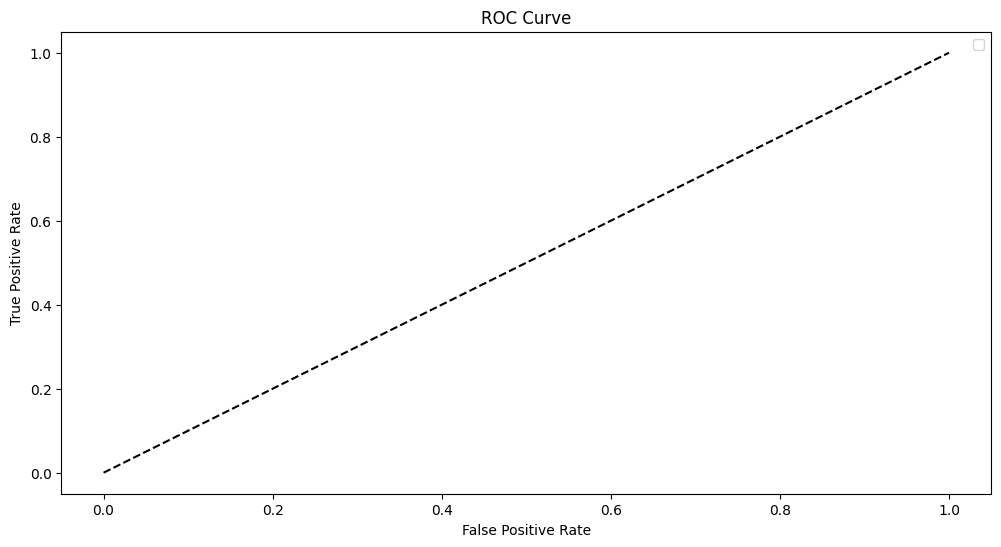

In [35]:
evaluate_multiclass_estimators(base_models, X_train_fasttext, X_test_fasttext, y_train_fasttext, y_test_fasttext)

Evaluating: SVC
Confusion Matrix for SVC:
[[  0   0  21  22   0   0   0   0]
 [  0   0   2   6   0   0   0   0]
 [  0   0  66  39   0   0   0   0]
 [  0   0  17 161   0   0   0   0]
 [  0   0   0  30   0   0   0   0]
 [  0   0   0  11   0   0   0   0]
 [  0   0   2   9   0   0   0   0]
 [  0   0   2  15   0   0   0   0]]

SVC does not support predict_proba. Skipping ROC Curve.
Train Accuracy: 0.5821
Test Accuracy: 0.5633
Train Precision: 0.1531
Test Precision: 0.1437
Train Recall: 0.1992
Test Recall: 0.1916
Train F1: 0.1703
Test F1: 0.1622
Kappa Statistic: 0.2814

Evaluating: KNN
Confusion Matrix for KNN:
[[  6   0  17  17   2   1   0   0]
 [  0   0   2   5   1   0   0   0]
 [  8   1  57  38   0   0   0   1]
 [  6   1  21 134  12   1   1   2]
 [  1   0   1  16  10   1   1   0]
 [  1   0   1   6   3   0   0   0]
 [  1   0   0  10   0   0   0   0]
 [  1   1   3  11   1   0   0   0]]

KNN does not support predict_proba. Skipping ROC Curve.
Train Accuracy: 0.6323
Test Accuracy: 0.5136
Trai

/tmp/ipykernel_77972/3475569641.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


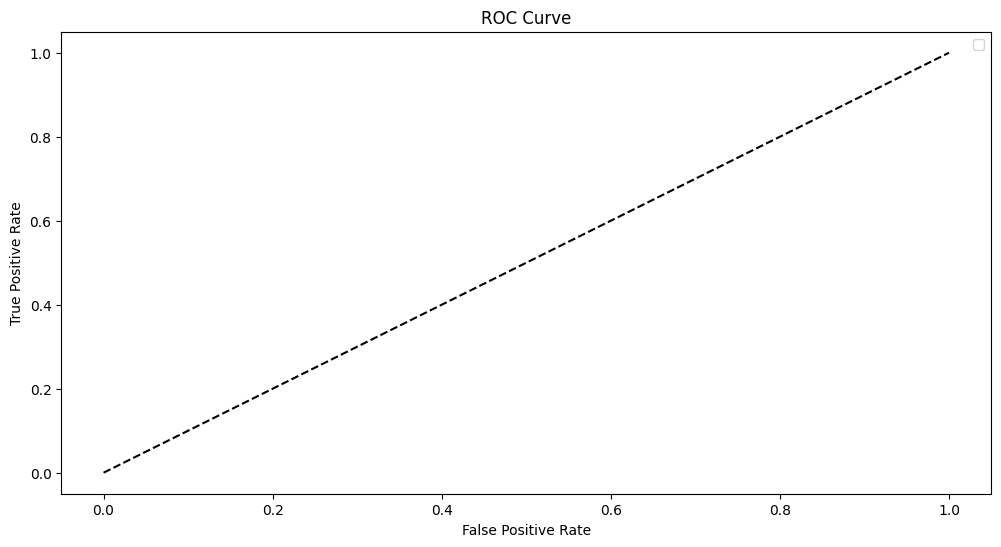

In [36]:
evaluate_multiclass_estimators(base_models, X_train_glove, X_test_glove, y_train_glove, y_test_glove )